

```


python packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.manifold import SpectralEmbedding
import requests
from io import StringIO

mounting google drive for accessing the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dataset used for clustering
https://archive.ics.uci.edu/dataset/531/stock+keeping+units

In [3]:
# Include the File path and Load it
file_path = '/content/drive/MyDrive/sku_data.xlsx'

# Load the XLSX dataset directly from Google Drive
df = pd.read_excel(file_path, engine='openpyxl')

In [4]:
df

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
0,1,0.058,547,9,2441.0,105.60,1.56,1920
1,2,0.954,547,0,0.0,207.68,1.00,384
2,3,2.385,547,12,23.0,165.78,1.02,108
3,4,5.100,547,0,0.0,221.04,1.05,72
4,5,0.000,547,0,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...
2274,2275,0.000,0,0,0.0,2.70,0.00,10
2275,2276,0.000,0,1,1.0,9.58,0.00,1
2276,2277,0.000,0,0,0.0,38.36,0.00,4
2277,2278,0.000,0,1,1.0,25.11,0.00,3


Data preprocessing

In [5]:
# Display basic information about the dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
   ID  Unitprice  Expire date  Outbound number  Total outbound  \
0   1      0.058          547                9          2441.0   
1   2      0.954          547                0             0.0   
2   3      2.385          547               12            23.0   
3   4      5.100          547                0             0.0   
4   5      0.000          547                0             0.0   

   Pal grossweight  Pal height  Units per pal  
0           105.60        1.56           1920  
1           207.68        1.00            384  
2           165.78        1.02            108  
3           221.04        1.05             72  
4             0.00        0.00              0  

Dataset Summary:
                ID    Unitprice  Expire date  Outbound number  Total outbound  \
count  2279.000000  2279.000000  2279.000000      2279.000000     2279.000000   
mean   1140.000000     4.269402   410.371654       235.976305      731.701053   
std     658.034953    14.449000   24

Exploratory data analysis

In [6]:
# Step 2: Data Preprocessing
# Handle missing values (if any)
df = df.dropna()

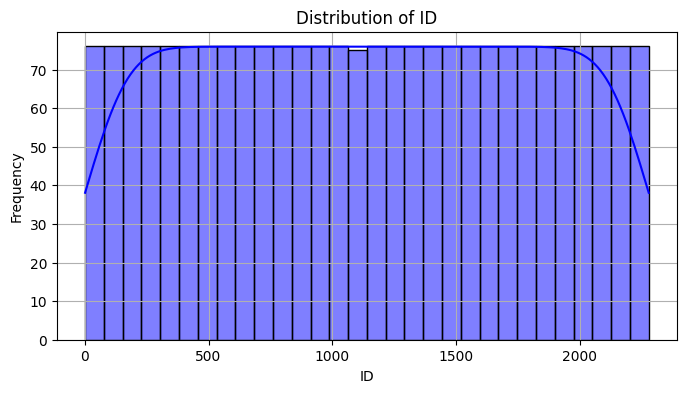

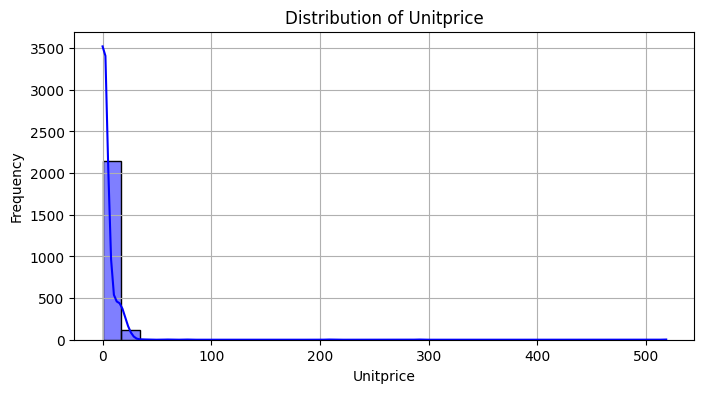

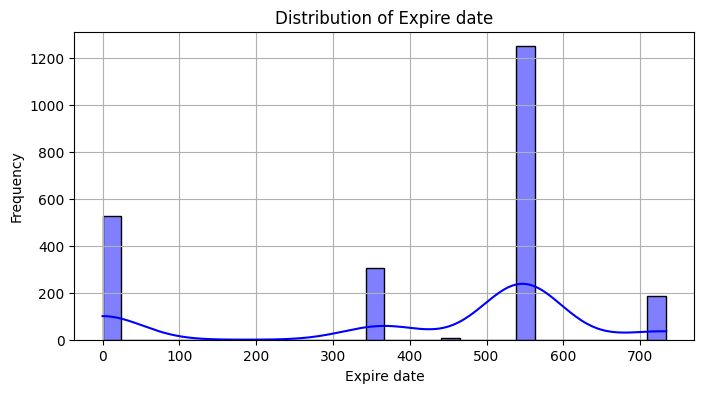

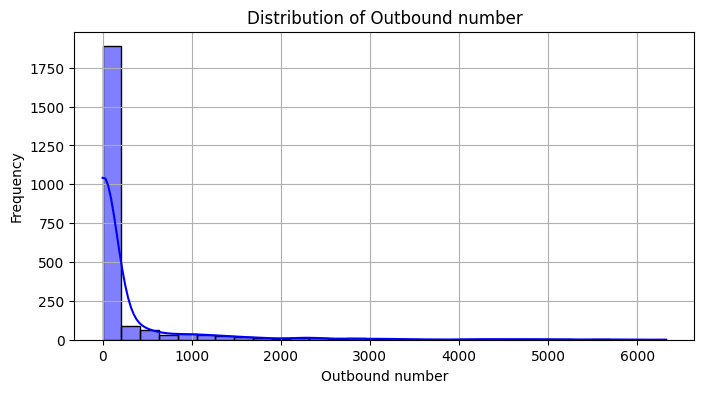

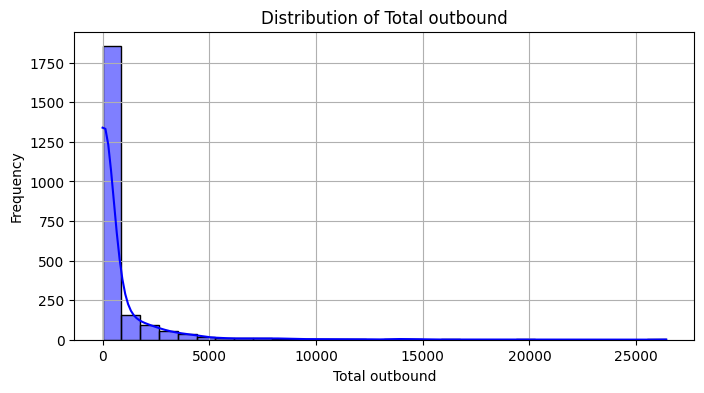

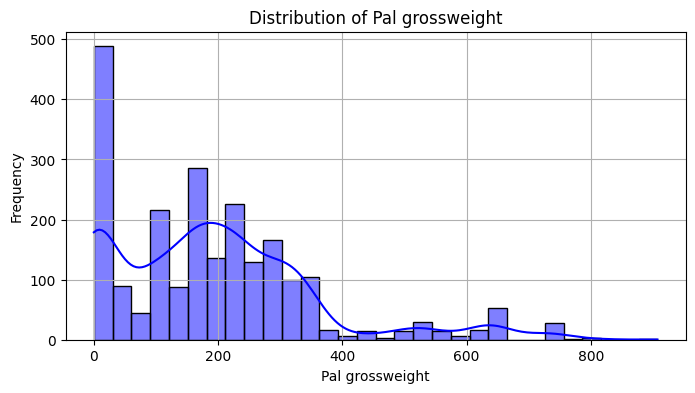

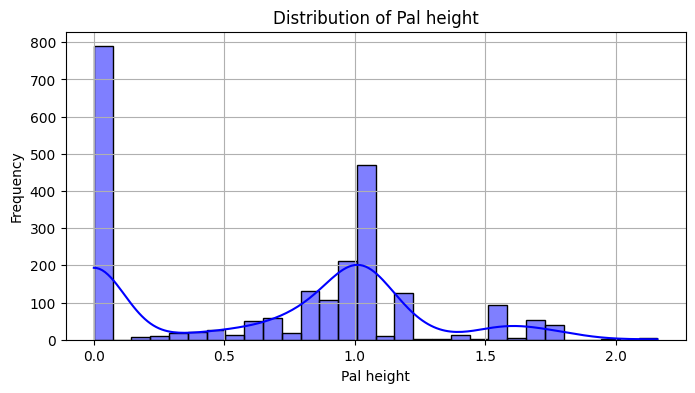

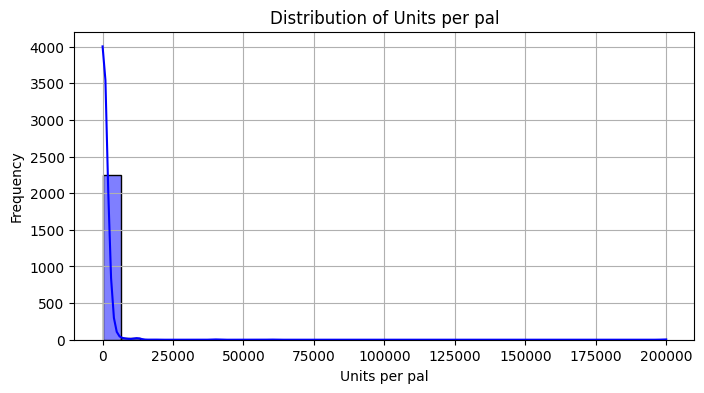

In [7]:
# Univariate Analysis: Distributions of Numerical Columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


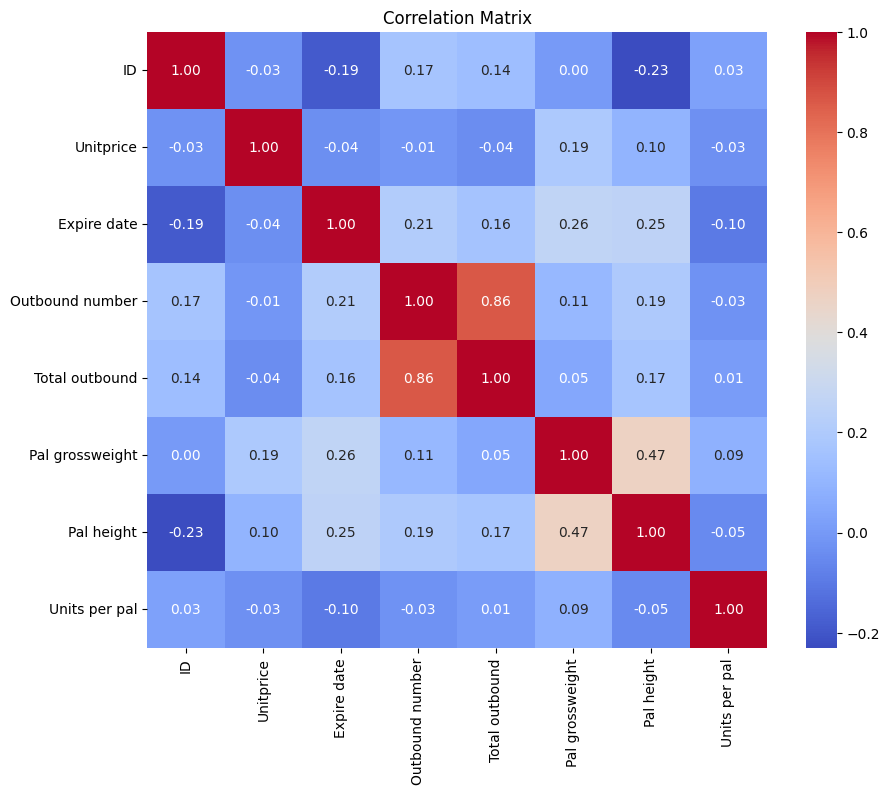

In [8]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

feature engineering


In [9]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

Elbow techique

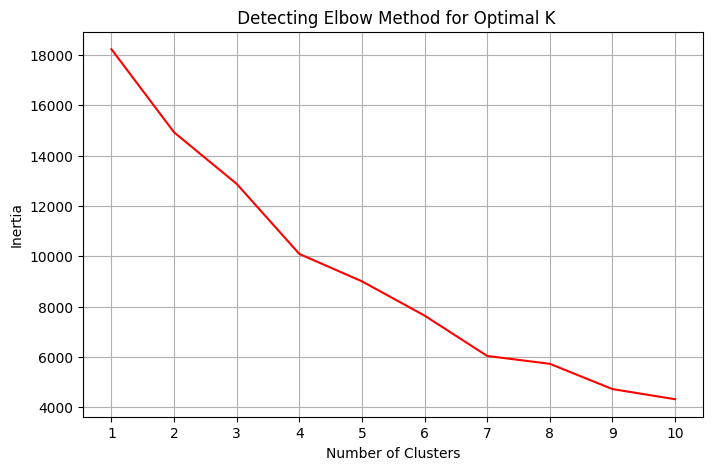

In [10]:
#  Determine the Optimal Number of Clusters (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'r')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title(' Detecting Elbow Method for Optimal K')
plt.grid(True)
plt.xticks(K)
plt.show()


k-means clsutering

Unique cluster labels in K-Means: [0 1 2]
Cluster counts:
 0    1330
1     947
2       2
Name: count, dtype: int64
Silhouette Score for K-Means: 0.264926415303179
Using columns for visualization: Pal grossweight, Pal height


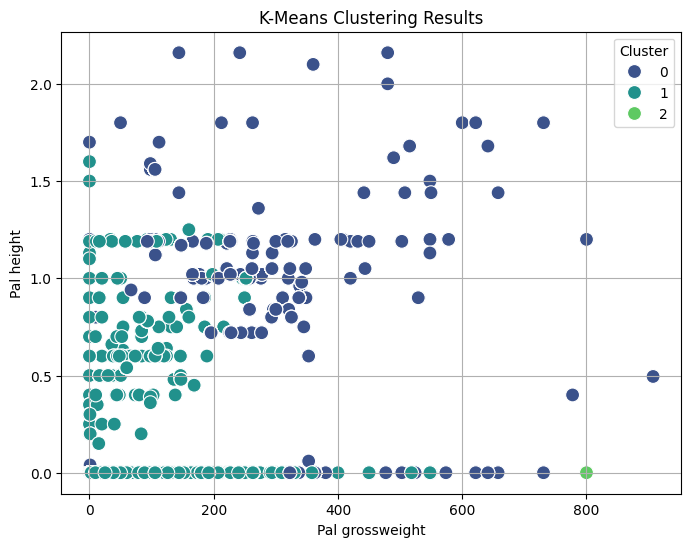

In [11]:
# Apply K-Means Clustering with Optimal K
optimal_k = 3  # Ensure this matches the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

# Add cluster labels to the dataset
df['Cluster_KMeans'] = clusters_kmeans

# Debugging Cluster Labels
print("Unique cluster labels in K-Means:", np.unique(clusters_kmeans))
print("Cluster counts:\n", pd.Series(clusters_kmeans).value_counts())

# Evaluate K-Means Clustering
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

# Select Specific Columns for Visualization
feature_x = 'Pal grossweight'
feature_y = 'Pal height'

print(f"Using columns for visualization: {feature_x}, {feature_y}")

# Visualize K-Means Clustering Results
unique_clusters = np.unique(clusters_kmeans)
num_clusters = len(unique_clusters)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x=feature_x,
    y=feature_y,
    hue='Cluster_KMeans',
    palette=sns.color_palette('viridis', num_clusters),
    s=100  # Adjust marker size
)
plt.title('K-Means Clustering Results')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [12]:
#  Apply K-Means Clustering based the Elbow Method for optimal clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

# Add cluster labels to the dataset
df['Cluster_KMeans'] = clusters_kmeans

In [21]:

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(data_scaled)


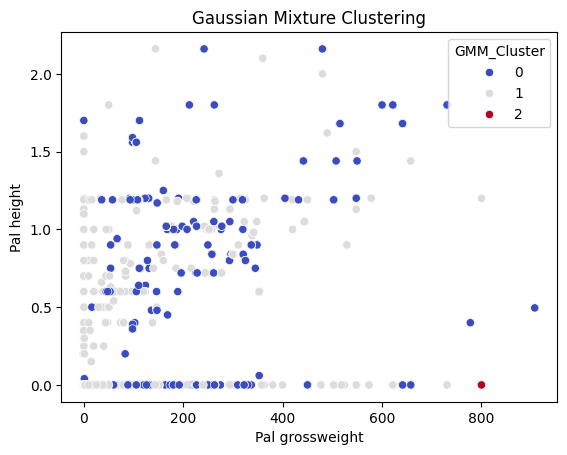

In [23]:
# Plot Cluster Distributions for GMM
sns.scatterplot(data=df, x='Pal grossweight', y='Pal height', hue='GMM_Cluster', palette='coolwarm')
plt.title('Gaussian Mixture Clustering')
plt.show()

In [24]:
# Count of GMM Clusters
gmm_cluster_counts = df['GMM_Cluster'].value_counts()
print("\nCount of Instances in Each GMM Cluster:")
print(gmm_cluster_counts)



Count of Instances in Each GMM Cluster:
GMM_Cluster
1    1452
0     825
2       2
Name: count, dtype: int64


In [25]:
gmm_silhouette = silhouette_score(data_scaled, df['GMM_Cluster'])
print(f'Silhouette Score for GMM: {gmm_silhouette}')

Silhouette Score for GMM: 0.14349941357640825


## other clustering techique that can be compared with is spectral which is under graph based clustering.

In [13]:
# Apply Spectral Clustering
spectral = SpectralEmbedding(n_components=2, random_state=42)
data_spectral = spectral.fit_transform(data_scaled)

In [14]:
# K-Means on Spectral Embedding
kmeans_spectral = KMeans(n_clusters=optimal_k, random_state=42)
clusters_spectral = kmeans_spectral.fit_predict(data_spectral)
df['Cluster_Spectral'] = clusters_spectral

In [15]:
# Evaluate Spectral Clustering
silhouette_spectral = silhouette_score(data_scaled, clusters_spectral)
print(f"Silhouette Score for Spectral Clustering: {silhouette_spectral}")

Silhouette Score for Spectral Clustering: 0.24084556647330327


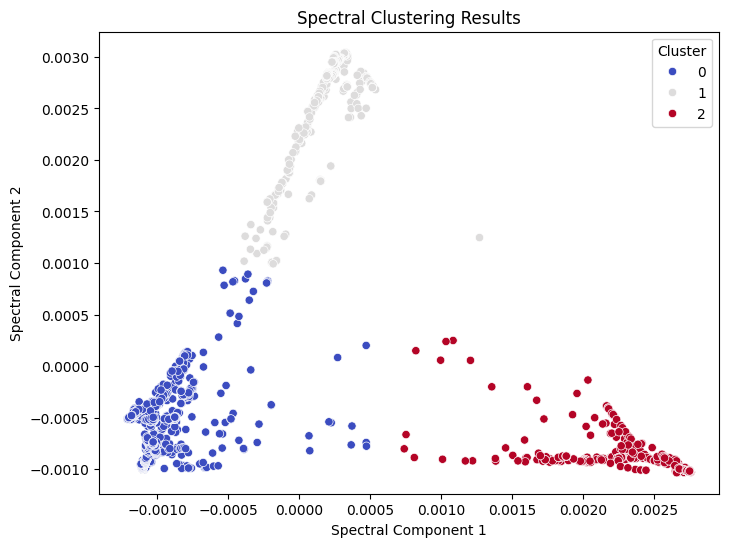

In [16]:
# Visualize Spectral Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_spectral[:, 0], y=data_spectral[:, 1], hue=df['Cluster_Spectral'], palette='coolwarm')
plt.title('Spectral Clustering Results')
plt.xlabel('Spectral Component 1')
plt.ylabel('Spectral Component 2')
plt.legend(title='Cluster')
plt.show()

In [29]:
# Compare Results
print("\nComparison of Clustering Results:")
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f'Silhouette Score for GMM: {gmm_silhouette}')



Comparison of Clustering Results:
K-Means Silhouette Score: 0.264926415303179
Silhouette Score for GMM: 0.14349941357640825



## comparing the 3 clustering but main focus is on k means and GMM

In [28]:
# Count data points in each cluster for K-Means
cluster_counts_kmeans = df['Cluster_KMeans'].value_counts().sort_index()

# Count data points in each cluster for Spectral Clustering
cluster_counts_spectral = df['Cluster_Spectral'].value_counts().sort_index()

# Display Cluster Counts in a Tabular Format
print("\nCluster Sizes:")
print("K-Means Clustering:")
print(cluster_counts_kmeans)

print("\nGussian mixture clustering")
print (gmm_cluster_counts)

print("\nSpectral Clustering:")
print(cluster_counts_spectral)


# Create a DataFrame for Cluster Comparisons
cluster_comparison = pd.DataFrame({
    'K-Means': cluster_counts_kmeans,
    'Spectral': cluster_counts_spectral,
    'GMM': gmm_cluster_counts
}).reset_index().rename(columns={'index': 'Cluster'})

# Display Cluster Sizes Comparison
print("\nCluster Size Comparison:")
print(cluster_comparison)


Cluster Sizes:
K-Means Clustering:
Cluster_KMeans
0    1330
1     947
2       2
Name: count, dtype: int64

Gussian mixture clustering
GMM_Cluster
1    1452
0     825
2       2
Name: count, dtype: int64

Spectral Clustering:
Cluster_Spectral
0    1274
1     498
2     507
Name: count, dtype: int64

Cluster Size Comparison:
   Cluster  K-Means  Spectral   GMM
0        0     1330      1274   825
1        1      947       498  1452
2        2        2       507     2
